# Testing

##   Inititializing

In [2]:
import cv2
import numpy
# Open the default camera
cap = cv2.VideoCapture(0)

# Check if camera opened successfully
if not cap.isOpened():
    print("Error opening camera")

# Capture frame-by-frame
ret, frame = cap.read()

# If the frame was successfully captured
if ret:
    # Saqve the frame as an image file
    cv2.imwrite('my_image.jpg', frame)

# Release the camera and close the window
cap.release()
cv2.destroyAllWindows()

In [6]:
cv2.destroyAllWindows()

In [ ]:
import cv2

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    cv2.imshow('frame', frame)
    if cv2.waitKey(1) == 48:
        break

cap.release()
cv2.destroyAllWindows()

In [12]:
import cv2 as cv
import glob
import numpy as np

for img in glob.glob("orange.jpg"):

    image = cv.imread(img)
    copy = image.copy()
    grey = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    decrease_noise = cv.fastNlMeansDenoising(grey, 10, 15, 7, 21)
    blurred = cv.GaussianBlur(decrease_noise, (3, 3), 0)
    canny = cv.Canny(blurred, 20, 40)
    thresh = cv.threshold(canny, 0, 255, cv.THRESH_OTSU + cv.THRESH_BINARY)[1]
    contours = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

    contours = contours[0] if len(contours) == 2 else contours[1]

    for c in contours:
        # obtain the bounding rectangle coordinates for each square
        x, y, w, h = cv.boundingRect(c)
        # With the bounding rectangle coordinates we draw the green bounding boxes
        cv.rectangle(copy, (x, y), (x + w, y + h), (36, 255, 12), 2)

    cv.imshow('copy', copy)
    cv.waitKey(0)
    cv.destroyAllWindows()

## Colour Detection

In [ ]:
import cv2
img = cv2.imread('E.jpg')
# Define the range of colors for white in HSV
white_range = [(0, 0, 230), (255, 30, 255)]

# Create a mask that selects only the white pixels
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv, white_range[0], white_range[1])

# Set the white pixels to black in the original image using the mask
img[mask != 0] = [0, 0, 0]

# Now the white background is black, and you can run the color detection code on the modified image
# Load the image


# Define the locations of each face in the image, as (x, y, w, h) tuples
face_locations = [
    (45, 40, 115, 115),   # Top left
    (172, 40, 115, 115),  # Top center
    (299, 40, 115, 115),  # Top right
    (45, 167, 115, 115),  # Middle left
    (172, 167, 115, 115), # Middle center
    (299, 167, 115, 115), # Middle right
    (45, 294, 115, 115),  # Bottom left
    (172, 294, 115, 115), # Bottom center
    (299, 294, 115, 115)  # Bottom right
]

# Define the range of colors for each face of the Rubik's cube in HSV
color_ranges = {
    'red': [(0, 70, 50), (10, 255, 255)],
    'orange': [(10, 70, 50), (20, 255, 255)],
    'yellow': [(20, 70, 50), (30, 255, 255)],
    'green': [(30, 70, 50), (60, 255, 255)],
    'blue': [(60, 70, 50), (120, 255, 255)],
    'white': [(0, 0, 200), (255, 30, 255)]
}

# Initialize an empty list to store the detected face colors
face_colors = []

# Loop through the face locations and detect the color of each face
for (x, y, w, h) in face_locations:
    # Extract the face image from the larger image
    face_img = img[y:y+h, x:x+w]
    
    # Convert the face image from the default BGR color space to HSV
    hsv = cv2.cvtColor(face_img, cv2.COLOR_BGR2HSV)
    
    # Find the mask that matches the face color
    face_color = None
    for color, (lower, upper) in color_ranges.items():
        mask = cv2.inRange(hsv, lower, upper)
        if cv2.countNonZero(mask) > 100:
            face_color = color
            break
    
    # Add the detected face color to the list
    face_colors.append(face_color)

# Print the list of detected face colors in row-major order
for i in range(3):
    row = face_colors[i*3:i*3+3]
    print(row)  # or you can store the rows in a list or write to a file, etc.


In [2]:
import numpy as np
import cv2 as cv
cap = cv.VideoCapture(0)
if not cap.isOpened():
    print("Cannot open camera")
    exit()
while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    # Our operations on the frame come here
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    # Display the resulting frame
    cv.imshow('frame', gray)
    if cv.waitKey(1) == ord('q'):
        break
# When everything done, release the capture
cap.release()
cv.destroyAllWindows()

## Crop

In [ ]:
import cv2

def main():

    # reading the input
    cap = cv2.VideoCapture(0)

    while(True):
        ret, frame = cap.read()
        if(ret):

            # adding filled rectangle on each frame
            cv2.rectangle(frame, (200, 100), (400, 300), (0, 0, 0), 3)


            # writing the new frame in output
            cv2.imshow("output", frame)

            if cv2.waitKey(1) & 0xFF == ord('c'):
                cv2.imwrite('koob.jpg', frame)

            if cv2.waitKey(1) & 0xFF == ord('s'):
                break
        else:
            break

    cv2.destroyAllWindows()
    cap.release()

main()

img = cv2.imread('input_image.jpg')

# Define the coordinates and dimensions of the region of interest (ROI)
x, y, w, h = 200, 100, 200, 200

# Crop the image using the ROI
cropped_img = img[y:y+h, x:x+w]

# Display the cropped image
cv2.imwrite('Cropped Image', cropped_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [1]:
import cv2

In [5]:
cv2.im?

Object `cv2.im` not found.


In [6]:
import cv2
import numpy

In [10]:
img = cv2.imread('cube.jpg')

In [11]:
im = cv2.resize(img, (300, 300), interpolation = cv2.INTER_AREA)

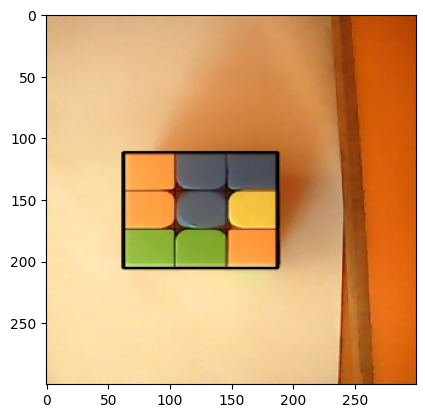

In [14]:
show(im)

## Stiching cropped images


In [2]:
import numpy as np
import cv2 as cv
cap = cv.VideoCapture(0)
if not cap.isOpened():
    print("Cannot open camera")
    exit()
while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    # Our operations on the frame come here
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    # Display the resulting frame
    cv.imshow('frame', gray)
    if cv.waitKey(1) == ord('q'):
        break
# When everything done, release the capture
cap.release()
cv.destroyAllWindows()

## Cells from stiched

In [ ]:
import cv2
import numpy as np
import PIL
import os
from matplotlib import pyplot as plt

import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

img = cv2.imread('stitched.jpg')
c = 0
for i in range (30):
    for j in range (30):
        c += 1
        x, y, w, h = (j*100)+40, (i*100)+40, 20, 20
        cropped_img = img[y:y+h, x:x+w]
        path = 'C:/Users/Ahmed/Pictures/cells'
        cv2.imwrite(os.path.join(path , f"{c-1}.jpg"), cropped_img)

# Code

## Image capture

In [ ]:
import cv2
import numpy as np
import PIL
from matplotlib import pyplot as plt

#for k in range (100):
cap = cv2.VideoCapture(0)
while(True):
    ret, frame = cap.read()
    if(ret):

            # cv2.rectangle(frame, (200, 100), (400, 300), (0, 0, 0), 3)
            # cv2.rectangle(frame, (200, 100), (267, 167), (0, 0, 0), 1)
            # cv2.rectangle(frame, (267, 167), (333, 233), (0, 0, 0), 1)
            # cv2.rectangle(frame, (333, 233), (400, 300), (0, 0, 0), 1)
            # cv2.rectangle(frame, (200, 100), (267, 167), (0, 0, 0), 1)
            # cv2.rectangle(frame, (267, 100), (333, 167), (0, 0, 0), 1)
            # cv2.rectangle(frame, (333, 100), (400, 167), (0, 0, 0), 1)
            # cv2.rectangle(frame, (200, 167), (267, 233), (0, 0, 0), 1)
            # cv2.rectangle(frame, (200, 233), (267, 300), (0, 0, 0), 1)
            # cv2.rectangle(frame, (267, 233 ), (333, 300), (0, 0, 0), 1)
            # frame = cv2.rotate(frame, cv2.ROTATE_90_COUNTERCLOCKWISE)

            # cv2.line(frame,(300, 200),(300,311),(0,127,255),2)
            # cv2.line(frame,(300, 200),(100,90),(0,127,255),2)
            # cv2.line(frame,(300, 200),(500,85),(0,127,255),2)
            # cv2.line(frame,(206, 150),(208,203),(0,127,255),2)
            # cv2.line(frame,(253, 175),(255,285),(0,127,255),2)
            # cv2.line(frame,(347, 172),(342,287),(0,127,255),2)
            # cv2.line(frame,(390, 150),(385,205),(0,127,255),2)
            # cv2.line(frame,(300, 256),(100,141),(0,127,255),3)
            # cv2.line(frame,(300, 312),(100,197),(0,127,255),3)
            # cv2.line(frame,(345, 173),(100,50),(0,127,255),3)
            # cv2.line(frame,(390, 145),(160,50),(0,127,255),3)
            # cv2.line(frame,(253, 175),(420,91),(0,127,255),3)
            # cv2.line(frame,(206, 150),(360,70),(0,127,255),3)
            # cv2.line(frame,(300, 256),(500,141),(0,127,255),3)
            # cv2.line(frame,(300, 312),(500,197),(0,127,255),3)



        cv2.rectangle(frame, (285, 180), (315, 160), (0, 0, 0), 1)
        cv2.rectangle(frame, (235, 155), (265, 135), (0, 0, 0), 1)
        cv2.rectangle(frame, (335, 155), (365, 135), (0, 0, 0), 1)

        cv2.rectangle(frame, (270, 200), (290, 230), (0, 0, 0), 1)
        cv2.rectangle(frame, (310, 200), (330, 230), (0, 0, 0), 1)

        cv2.rectangle(frame, (270, 260), (290, 290), (0, 0, 0), 1)
        cv2.rectangle(frame, (310, 260), (330, 290), (0, 0, 0), 1)

        cv2.rectangle(frame, (220, 175), (240, 205), (0, 0, 0), 1)
        cv2.rectangle(frame, (360, 175), (380, 205), (0, 0, 0), 1)

        cv2.imshow("output", frame)
        if cv2.waitKey(1) & 0xFF == ord('c'):
            cv2.imwrite('cube.jpg', frame)
            break
    else:
        break
cv2.destroyAllWindows()
cap.release()

#     height, width, channels = img.shape
#     print (height, width, channels)
#     x, y, w, h = 100, 240, 200, 200
#     img = img[y:y+h, x:x+w]
#     img = cv2.resize(img, (300, 300), interpolation = cv2.INTER_AREA)
#     cv2.imshow("output", img)
#     cv2.imwrite(f"{k}.jpg", img)

cv2.waitKey(0)
cv2.destroyAllWindows()



## Image crop

In [ ]:
import cv2
import numpy as np
import PIL
import os
from matplotlib import pyplot as plt


img = cv2.imread('cube.jpg')
c = 0

x = [285,235,335,270,310,270,310,220,360]
y = [160,135,135,200,200,260,260,175,175]
w = [30,30,30,20,20,20,20,20,20]
h = [20,20,20,30,30,30,30,30,30]

for c in range(9):
    cropped_img = img[y[c]+1:y[c]+h[c], x[c]+1:x[c]+w[c]]
    path = 'C:/Users/Ahmed/Pictures/cells'
    cv2.imwrite(os.path.join(path , f"{c}.jpg"), cropped_img)